In [ ]:
!pip install tensorflow

In [ ]:
!pip install keras

In [ ]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.datasets import cifar10
from keras.callbacks import TensorBoard

from time import strftime


from numpy.random import seed
from IPython.display import display
from keras.preprocessing.image import array_to_img

seed(888)
tf.random.set_seed(404)

%matplotlib inline

In [ ]:
IMAGE_WIDTH = 32
IMAGE_HEIGHT = 32
IMAGE_PIXELS = IMAGE_WIDTH * IMAGE_HEIGHT
COLOR_CHANNELS = 3
TOTAL_INPUTS = IMAGE_PIXELS * COLOR_CHANNELS

# constants

In [ ]:
LABEL_NAMES = ['Plane', 'Car', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Get data

In [ ]:
(x_train_all, y_train_all), (x_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 11s 0us/step


In [ ]:
print(type(cifar10))
print(type(x_train_all))

<class 'module'>
<class 'numpy.ndarray'>


# Explore the Data

In [ ]:
x_train_all[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

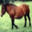

In [ ]:
pic = array_to_img(x_train_all[7])
display(pic)

In [ ]:
y_train_all.shape

(50000, 1)

In [ ]:
y_train_all[7][0]

7

In [ ]:
LABEL_NAMES[y_train_all[7][0]]

'Horse'

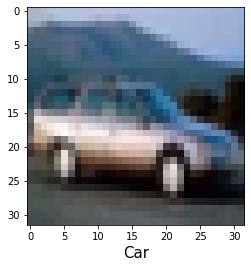

In [ ]:
plt.imshow(x_train_all[4])
plt.xlabel(LABEL_NAMES[y_train_all[4][0]], fontsize = 15)
plt.show()

**Challenge**
Write a for loop to display the first 10 images from the x_train_all array in a row. Show the name of the label below the picture. Remove the ungly tick marks. 

**Hint:** Use matplotlib

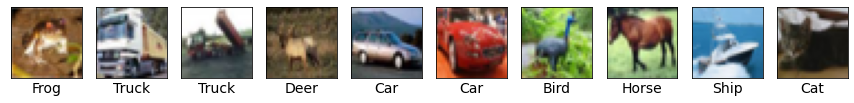

In [ ]:
plt.figure(figsize = (15,5))


for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.yticks([])
    plt.xticks([])
    plt.xlabel(LABEL_NAMES[y_train_all[i][0]], fontsize = 14)
    plt.imshow(x_train_all[i])

In [ ]:
x_train_all[8].shape

(32, 32, 3)

In [ ]:
x_train_all.shape

(50000, 32, 32, 3)

In [ ]:
nr_of_images, x, y, c = x_train_all.shape
print(f'images = {nr_of_images} \t| width = {x} \t| height = {y} \t| channels = {c}')

images = 50000 	| width = 32 	| height = 32 	| channels = 3


In [ ]:
x_test.shape

(10000, 32, 32, 3)

# Preprocess Data

In [ ]:
x_train_all, x_test = x_train_all / 255.0, x_test / 255.0

In [ ]:
x_train_all[0][0][0][0]

0.23137254901960785

In [ ]:
type(x_train_all[0][0][0][0])

numpy.float64

In [ ]:
x_train_all = x_train_all.reshape(x_train_all.shape[0], 32* 32* 3) 

In [ ]:
x_train_all.shape

(50000, 3072)

In [ ]:
x_test = x_test.reshape(x_test.shape[0], 32* 32* 3) 

In [ ]:
x_test.shape

(10000, 3072)

# Create Validation Dataset

In [ ]:
x_validation = x_train_all[:10000]
y_validation = y_train_all[:10000]
print(x_validation.shape)
print(y_validation.shape)

(10000, 3072)
(10000, 1)


 **Challenge**
 Create two numpy arrays x_train and y_train that have the shape (40000, 3072) and (40000, 1) respectively. They need to contain the last 40000 values from x_train_all and y_train_all

In [ ]:
x_train = x_train_all[10000:]
y_train = y_train_all[10000:]
print(x_train.shape)
print(y_train.shape)

(40000, 3072)
(40000, 1)


# Create a small dataset for validation to not slow down the laptop

In [ ]:
x_train_xs = x_train[:1000]
y_train_xs = y_train[:1000]
print(x_train_xs.shape)
print(y_train_xs.shape)

(1000, 3072)
(1000, 1)


# Define the Neural Network using Keras

In [ ]:
model_1 = Sequential([
    Dense(units = 128, input_dim = 32 * 32 * 3, activation = 'relu', name = 'ml_hidden_layer1'),
    Dense(units = 64, activation = 'relu', name = 'ml_hidden_layer2'),
    Dense(units = 16, activation = 'relu', name = 'ml_hidden_layer3'),
    Dense(units = 10, activation = 'softmax', name = 'ml_output_layer')])

model_1.compile(optimizer = 'adam', 
                loss = 'sparse_categorical_crossentropy', 
                metrics = ['accuracy'])

In [ ]:
model_2 = Sequential()
model_2.add(Dropout(0.2, seed = 42, input_shape = (32 * 32 * 3,)))
model_2.add(Dense(units =128, activation='relu', name = 'm2_hidden_layer1'))
model_2.add(Dense(units=64, activation='relu', name = 'm2_hidden_layer2'))
model_2.add(Dense(units=16, activation='relu', name = 'm2_hidden_layer3'))
model_2.add(Dense(units=10, activation='softmax', name = 'm2_output_layer'))

model_2.compile(optimizer = 'adam', 
                loss = 'sparse_categorical_crossentropy',
                metrics = ['accuracy'])

In [ ]:
model_3 = Sequential()
model_3.add(Dropout(0.2, seed = 42, input_shape = (32 * 32 * 3,)))
model_3.add(Dense(units =128, activation='relu', name = 'm2_hidden_layer1'))
model_3.add(Dropout(0.25, seed = 42))
model_3.add(Dense(units=64, activation='relu', name = 'm2_hidden_layer2'))
model_3.add(Dense(units=16, activation='relu', name = 'm2_hidden_layer3'))
model_3.add(Dense(units=10, activation='softmax', name = 'm2_output_layer'))

model_3.compile(optimizer = 'adam', 
                loss = 'sparse_categorical_crossentropy',
                metrics = ['accuracy'])

In [ ]:
type(model_1)

keras.engine.sequential.Sequential

In [ ]:
type(model_2)

keras.engine.sequential.Sequential

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 ml_hidden_layer1 (Dense)    (None, 128)               393344    
                                                                 
 ml_hidden_layer2 (Dense)    (None, 64)                8256      
                                                                 
 ml_hidden_layer3 (Dense)    (None, 16)                1040      
                                                                 
 ml_output_layer (Dense)     (None, 10)                170       
                                                                 
Total params: 402,810
Trainable params: 402,810
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 3072)              0         
                                                                 
 m2_hidden_layer1 (Dense)    (None, 128)               393344    
                                                                 
 m2_hidden_layer2 (Dense)    (None, 64)                8256      
                                                                 
 m2_hidden_layer3 (Dense)    (None, 16)                1040      
                                                                 
 m2_output_layer (Dense)     (None, 10)                170       
                                                                 
Total params: 402,810
Trainable params: 402,810
Non-trainable params: 0
_________________________________________________________________


In [ ]:
(32 * 32 * 3 * 128 + 128) + (128 * 64 + 64) + (64 * 16 + 16) + (16 * 10 + 10)

402810

# Tensorboard (Visualising Learning)

In [ ]:
def get_tensorboard(model_1):
    
    folder_name = f'model_name at {strftime("%H %M %S %A")}'
    dir_paths = os.path.join('tensorboard_cifar_logs/', folder_name)

    try:
        os.makedirs(dir_paths)
    except OSError as err:
        print(err.strerror)
    else:
        print('Successfully created directory')

    return TensorBoard(log_dir = dir_paths)

# Fit the model

In [ ]:
sample_per_batch = 1000

In [ ]:
%%time

number_of_epochs = 150
model_1.fit(x_train_xs, 
            y_train_xs, 
            batch_size = sample_per_batch, 
            epochs = number_of_epochs, 
            verbose = 0,
            callbacks = [get_tensorboard('Model 1')],
            validation_data = (x_validation, y_validation) )

Successfully created directory
CPU times: user 20.2 s, sys: 1.61 s, total: 21.8 s
Wall time: 41.7 s


In [ ]:
%%time

number_of_epochs = 150
model_2.fit(x_train_xs, 
            y_train_xs, 
            batch_size = sample_per_batch, 
            epochs = number_of_epochs, 
            verbose = 0,
            callbacks = [get_tensorboard('Model 2')],
            validation_data = (x_validation, y_validation) )

Successfully created directory
CPU times: user 20.1 s, sys: 1.53 s, total: 21.6 s
Wall time: 21 s


In [ ]:
%%time

number_of_epochs = 150
model_3.fit(x_train_xs, 
            y_train_xs, 
            batch_size = sample_per_batch, 
            epochs = number_of_epochs, 
            verbose = 0,
            callbacks = [get_tensorboard('Model 3')],
            validation_data = (x_validation, y_validation) )

Successfully created directory
CPU times: user 20.5 s, sys: 1.53 s, total: 22 s
Wall time: 21.3 s


In [ ]:
%%time

number_of_epochs = 100
model_1.fit(x_train, 
            y_train, 
            batch_size = sample_per_batch, 
            epochs = number_of_epochs, 
            verbose = 0,
            callbacks = [get_tensorboard('Model 1 XL')],
            validation_data = (x_validation, y_validation) )

Successfully created directory
CPU times: user 54.2 s, sys: 3.26 s, total: 57.5 s
Wall time: 1min 22s


In [ ]:
%%time

number_of_epochs = 100
model_2.fit(x_train, 
            y_train, 
            batch_size = sample_per_batch, 
            epochs = number_of_epochs, 
            verbose = 0,
            callbacks = [get_tensorboard('Model 2 XL')],
            validation_data = (x_validation, y_validation) )

Successfully created directory
CPU times: user 57.7 s, sys: 3.36 s, total: 1min 1s
Wall time: 44.5 s


In [ ]:
%%time

number_of_epochs = 100
model_3.fit(x_train, 
            y_train, 
            batch_size = sample_per_batch, 
            epochs = number_of_epochs, 
            verbose = 0,
            callbacks = [get_tensorboard('Model 3 XL')],
            validation_data = (x_validation, y_validation) )

Successfully created directory
CPU times: user 56.5 s, sys: 3.44 s, total: 59.9 s
Wall time: 1min 22s


# Make Prediction on Individual Images

In [ ]:
x_validation.shape

(10000, 3072)

In [ ]:
x_validation[0].shape

(3072,)

In [ ]:
test = np.expand_dims(x_validation[0], axis = 0)
test.shape

(1, 3072)

In [ ]:
model_1.predict(test)

array([[7.5867930e-03, 7.1881240e-04, 1.0587942e-01, 1.2640622e-01,
        7.9464972e-02, 2.1750286e-01, 3.2137841e-01, 1.4032108e-01,
        9.7971366e-05, 6.4343261e-04]], dtype=float32)

In [ ]:
%load_ext tensorboard

In [ ]:
model_2.predict(x_validation)

array([[1.3801499e-02, 6.2028961e-03, 9.8190792e-02, ..., 5.5030100e-02,
        8.8897860e-04, 2.6246575e-03],
       [6.0849488e-03, 6.3670641e-01, 3.5323272e-04, ..., 3.1710113e-03,
        2.3482122e-01, 1.0971795e-01],
       [2.2417426e-02, 4.3072108e-02, 1.3488398e-02, ..., 4.0746246e-02,
        9.1398982e-03, 8.2413542e-01],
       ...,
       [2.3039598e-03, 4.1781598e-01, 1.7197507e-03, ..., 1.8861836e-03,
        3.2996595e-02, 5.2470475e-01],
       [1.4037281e-02, 4.8111448e-01, 1.0308522e-01, ..., 5.8293017e-03,
        7.0077684e-03, 2.6914069e-01],
       [2.7418768e-04, 7.5197459e-05, 6.4815857e-02, ..., 5.1143616e-01,
        5.5711625e-05, 2.3803173e-04]], dtype=float32)

In [ ]:
model_2.predict(x_validation).shape

(10000, 10)

In [ ]:
model_2.predict(test)

array([[0.0138014 , 0.00620283, 0.09819076, 0.27688298, 0.07712004,
        0.12456152, 0.34469682, 0.05503011, 0.00088897, 0.00262464]],
      dtype=float32)

In [ ]:
np.argmax(model_2.predict(test))  #predicts class number 6 as the largest class probability

6

In [ ]:
#to check if it got the prediction right:
y_validation[0]

array([6], dtype=uint8)

In [ ]:
#IT therefore predicted the correct class in the x_validation dataset

**Challenge**

Write a loop where you print out the actual value and the preicted value for the first 10 Images in the validation dataset

In [ ]:
for number in range(10):
    test_image = np.expand_dims(x_validation[number], axis = 0)
    predicted_validation = np.argmax(model_2.predict(test_image)[0])
    print(f'Actual value: {y_validation[number][0]} vs. predicted: {predicted_validation}')

Actual value: 6 vs. predicted: 6
Actual value: 9 vs. predicted: 1
Actual value: 9 vs. predicted: 9
Actual value: 4 vs. predicted: 4
Actual value: 1 vs. predicted: 1
Actual value: 1 vs. predicted: 9
Actual value: 2 vs. predicted: 4
Actual value: 7 vs. predicted: 7
Actual value: 8 vs. predicted: 8
Actual value: 3 vs. predicted: 4


# Evaluation

In [ ]:
model_2.metrics_names

['loss', 'accuracy']

In [ ]:
test_loss, test_accuracy = model_2.evaluate(x_test, y_test)
print(f'Test loss is {test_loss:0.3} and test accuracy is {test_accuracy:0.1%}')

313/313 [==============================] - 1s 4ms/step - loss: 1.4449 - accuracy: 0.4879
Test loss is 1.44 and test accuracy is 48.8%


## Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
predictions = np.argmax(model_2.predict(x_test), axis = -1)

In [ ]:
predictions

array([5, 8, 8, ..., 3, 4, 7])

In [ ]:
conf_matrix = confusion_matrix(y_true = y_test, y_pred = predictions)

In [ ]:
conf_matrix.shape

(10, 10)

In [ ]:
number_of_rows = conf_matrix.shape[0]
number_of_columns = conf_matrix.shape[1]
print(number_of_rows)
print(number_of_columns)

10
10


In [ ]:
# largest vallue in the matrix
conf_matrix.max()

643

In [ ]:
#smallest value in the matrix
conf_matrix.min()

4

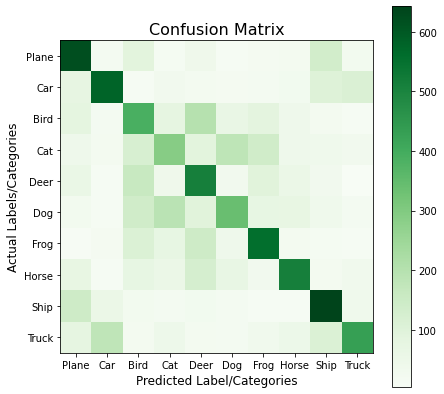

In [ ]:
plt.figure(figsize = (7, 7))
plt.imshow(conf_matrix, cmap = plt.cm.Greens)

plt.title('Confusion Matrix', fontsize = 16)
plt.ylabel('Actual Labels/Categories', fontsize = 12)
plt.xlabel('Predicted Label/Categories', fontsize = 12)

tick_marks = np.arange(10)

plt.yticks(tick_marks, LABEL_NAMES)
plt.xticks(tick_marks, LABEL_NAMES)

plt.colorbar()
plt.show()

In [ ]:
import itertools

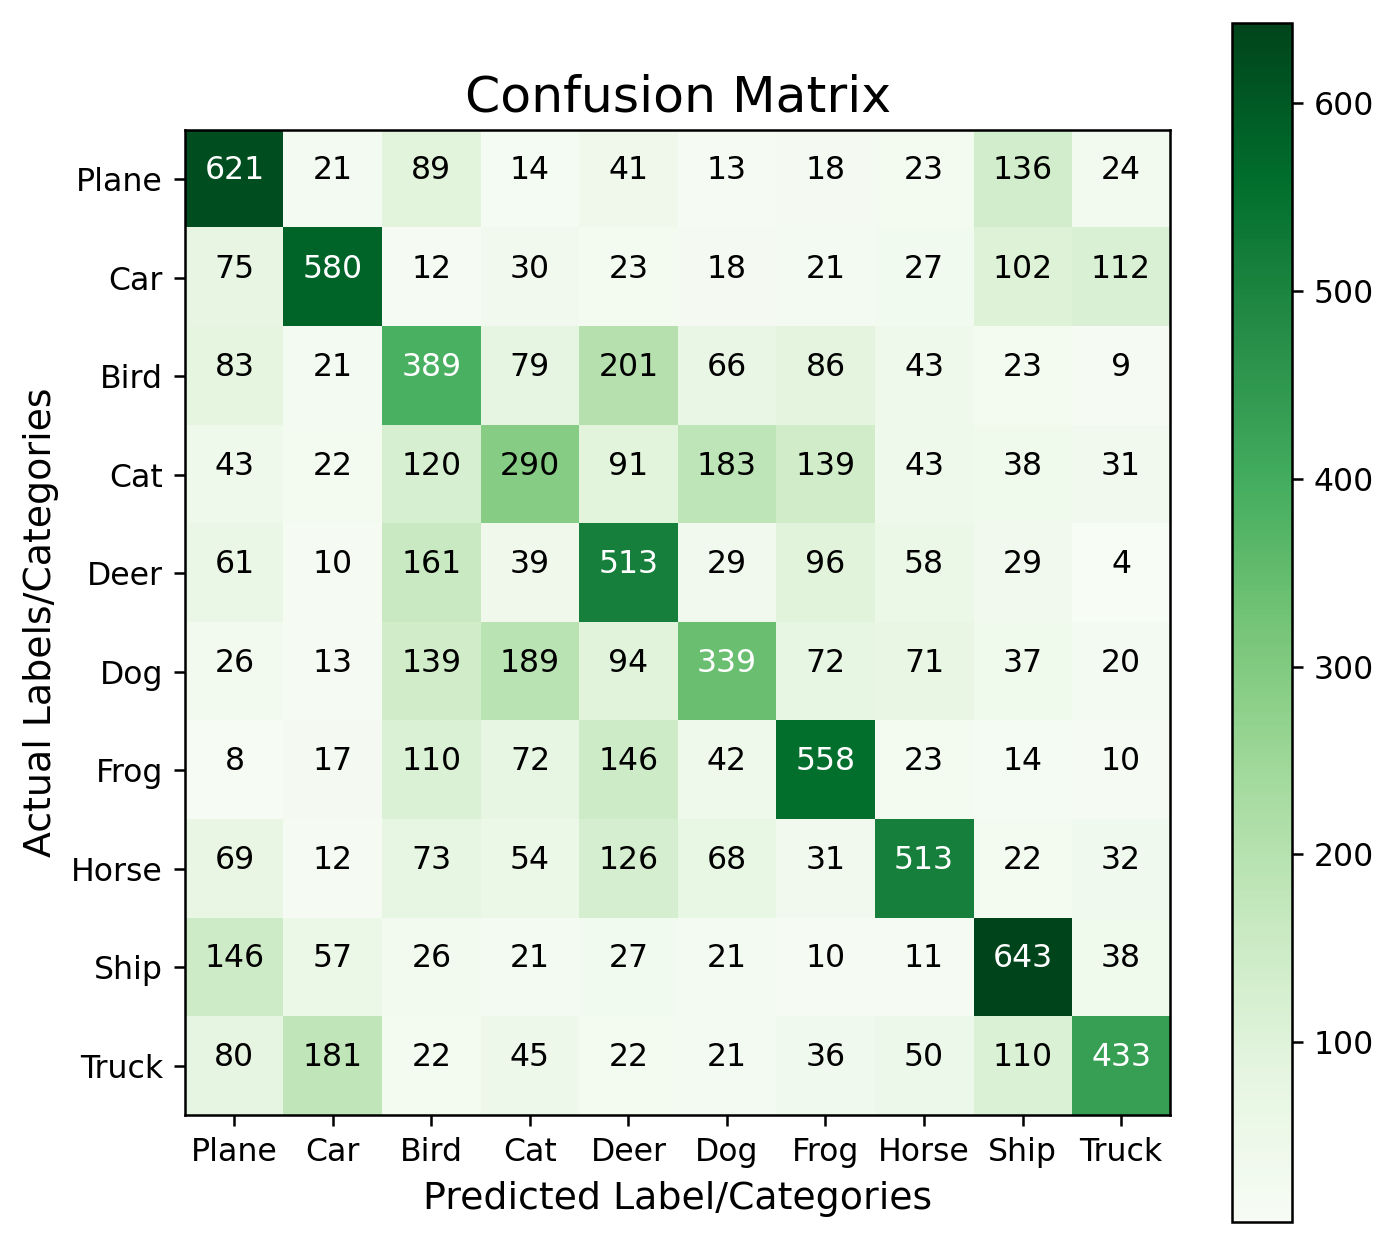

In [ ]:
plt.figure(figsize = (7, 7), dpi = 117)
plt.imshow(conf_matrix, cmap = plt.cm.Greens)

plt.title('Confusion Matrix', fontsize = 16)
plt.ylabel('Actual Labels/Categories', fontsize = 12)
plt.xlabel('Predicted Label/Categories', fontsize = 12)

tick_marks = np.arange(10)

plt.yticks(tick_marks, LABEL_NAMES)
plt.xticks(tick_marks, LABEL_NAMES)

plt.colorbar()

for i, j in itertools.product(range(number_of_rows), range(number_of_columns)):
  plt.text(j, i, conf_matrix[i,j], horizontalalignment = 'center', 
           color = 'white' if conf_matrix[i, j] > conf_matrix.max()/2 else 'black')

plt.show()

** Challenge ** Identify the false positives, false negateives and the true positives in the confusion matrix

In [ ]:
# True Positives
np.diag(conf_matrix)

array([621, 580, 389, 290, 513, 339, 558, 513, 643, 433])

In [ ]:
recall_score = np.diag(conf_matrix) / np.sum(conf_matrix, axis = 1)
print(recall_score)

[0.621 0.58  0.389 0.29  0.513 0.339 0.558 0.513 0.643 0.433]


In [ ]:
precision_score = np.diag(conf_matrix) / np.sum(conf_matrix, axis = 0)
print(precision_score)

[0.51237624 0.62098501 0.34092901 0.34813926 0.39953271 0.42375
 0.52296157 0.59512761 0.55719237 0.60729313]


In [ ]:
#Recall Score and Precision Score of the model as a whole

#Recall Score
average_recall_score = np.mean(recall_score)
print(f'Model 2 recall score is {average_recall_score:.2%}')

average_precision_score = np.mean(precision_score)
print(f'Model 2 precision score is {average_precision_score:.2%}')

f1_score = 2 * (average_precision_score * average_recall_score)/(average_precision_score + average_recall_score)
print(f'Model 2 F1 Score is {f1_score:.2%}')

Model 2 recall score is 48.79%
Model 2 precision score is 49.28%
Model 2 F1 Score is 49.04%
